## 4.2 뉴스 기사 분류: 다중 분류 문제

### 4.2.1 로이터 데이터셋

>코드 4-11 로이터 데이터셋 로드하기

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
print(len(train_data), len(test_data))


8982 2246


In [3]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


### 4.2.2 데이터 준비

>코드 4-12 로이터 데이터셋을 텍스트로 디코딩하기

>코드 4-13 데이터 인코딩하기

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        for j in sequences:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

레이블 > 벡터 변환
- 레이블의 리스트를 정수 텐서로 변환
- 원-핫 인코딩(one-hot encoding)=범주형 인코딩(categorical_encoding)

>코드 4-14 레이블 인코딩하기

In [5]:
def to_ont_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_ont_hot(train_labels)
y_test = to_ont_hot(test_labels)

케라스 내장 함수 사용

In [22]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 4.2.3 모델 구성

>코드 4-15 모델 정의하기

In [7]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

>코드 4-16 모델 컴파일하기

In [8]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### 4.2.4 훈련 검증

>코드 4-17 검증 세트 준비하기

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

>코드 4-18 모델 훈련하기

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 6s 34ms/step - loss: 2.5358 - accuracy: 0.5182 - val_loss: 1.6665 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.3969 - accuracy: 0.7033 - val_loss: 1.2887 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0478 - accuracy: 0.7695 - val_loss: 1.1219 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8352 - accuracy: 0.8192 - val_loss: 1.0271 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6746 - accuracy: 0.8561 - val_loss: 0.9831 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5392 - accuracy: 0.8874 - val_loss: 0.9239 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4347 - accuracy: 0.9065 - val_loss: 0.9237 - val_accuracy: 0.7950
Epoch 8/20
16

>코드 4-19 훈련과 검증 손실 그리기

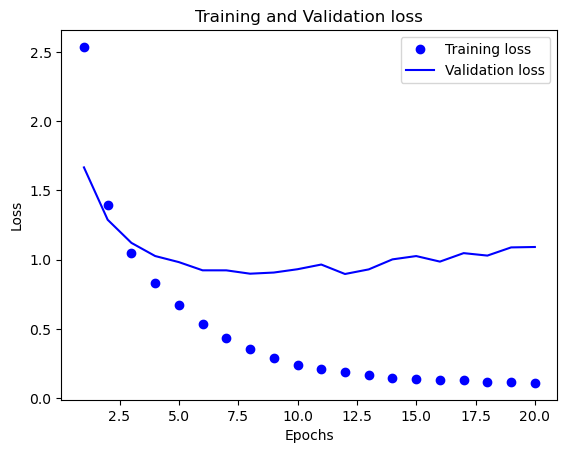

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

>코드 4-20 훈련과 검증 정확도 그리기

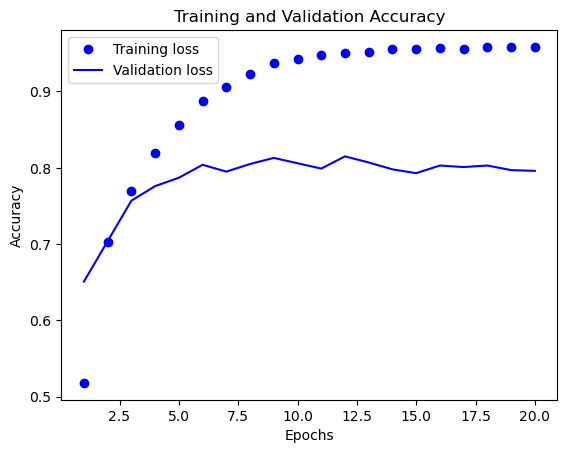

In [25]:
plt.clf()
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "bo", label="Training loss")
plt.plot(epochs, val_accuracy, "b", label="Validation loss")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

>코드 4-21 모델을 처음부터 다시 훈련하기

In [13]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 16ms/step - loss: 2.4769 - accuracy: 0.5053
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.3365 - accuracy: 0.7192
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.0000 - accuracy: 0.7849
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.7873 - accuracy: 0.8322
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6230 - accuracy: 0.8662
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4976 - accuracy: 0.8935
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4006 - accuracy: 0.9163
Epoch 8/9
16/16 [==============================] - 0s 15ms/step - loss: 0.3339 - accuracy: 0.9286
Epoch 9/9
71/71 [==============================] - 0s 5ms/step - loss: 0.9907 - accuracy: 0.7907
[0.9907246232032776, 0.790739119052887]


### 4.2.5 새로운 데이터에 대해 예측하기

In [14]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [15]:
predictions[0].shape

(46,)

In [16]:
np.sum(predictions[0])

1.0000001

In [17]:
np.argmax(predictions[0])

3

### 4.2.6 레이블과 손실을 다루는 다른 방법

레이블을 인코딩하는 다른 방법, 정수 텐서로 변환

In [18]:
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)

정수 텐서 변환 방식 사용하려면 손실 함수 변경 필요

sparse_categorical_crossentropy를 사용해야 함

- categorical_crossentropy > 레이블 범주형 인코딩
- sparse_categorical_crossentropy > 정수 레이블

인터페이스만 다르고 수학적으로는 동일

In [20]:
# model.compile(optimizer="rmsprop",
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

### 4.2.7 충분히 큰 중간층을 두어야 하는 이유

마지막 출력이 46차원 이기 때문에 중간층의 중간 유닛이 46개보다 많이 적어서는 안됨

>코드 4-22 정보 병목이 있는 모델

In [24]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 3.0731 - accuracy: 0.3287 - val_loss: 2.3366 - val_accuracy: 0.5800
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.8054 - accuracy: 0.5913 - val_loss: 1.5314 - val_accuracy: 0.6210
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.3168 - accuracy: 0.6825 - val_loss: 1.3551 - val_accuracy: 0.6690
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1177 - accuracy: 0.7348 - val_loss: 1.2770 - val_accuracy: 0.7110
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9935 - accuracy: 0.7590 - val_loss: 1.2535 - val_accuracy: 0.7070
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9039 - accuracy: 0.7789 - val_loss: 1.2738 - val_accuracy: 0.7060
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8300 - accuracy: 0.7913 - val_loss: 1.2662 - val_accuracy: 0.7070
Epoch 8/20
63/63 [=

검증 정확도 최고 값 감소하였음

손실의 원인 대부분은 많은 정보를 중간층의 저차원 표현 공간으로 압축하려 했기 때문임